In [0]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import numpy as np

#df = pd.read_csv('https://raw.githubusercontent.com/deepanshumehtaa/csvfiles/master/advertising.csv', index_col = 0)
#df = df.reset_index()

# Logistic Regression - Multiple Variables

In [0]:
import seaborn as sns
from pandas import DataFrame
import sklearn as skt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
class Dataset:
    
    def __str__(self):
        return "Dataset: The 'scikit-learn' Boston House-Prices" 
    
    def __init__(self, df):
        print(self)        
        self.df = df

    def load(self):
        boston = load_boston()
        self.data = boston
    
        self.plot_correlations()
        
        X = boston.data
        
        # Choose only a subset of features
        features_limit = ["LSTAT", "RM", "PTRATIO"]
        if len(features_limit)>0:
            features_index = np.where(dataset.data.feature_names==np.array(features_limit).reshape(-1,1))[1]
            X = X[:, features_index]
        
        X = self.preprocess(X)           # for normalizing    
        
        y = boston.target.reshape(-1, 1) # Convert to Column vector        
        
        # Insert bias feature (x0 = 1) into features for all examples
        X = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
                
        print("Informations:")
        print("\t X ~", np.shape(X))
        print("\t y ~", np.shape(y))
        
        # Sanity check
        assert(len(X)==len(y))       # assertions are internal self-checks
        m = len(X)                   # declearing m
        self.m = m
        print("\t m:", m)            
        
        # Number of features...... n
        n = np.shape(X)[1]
        self.n = n            
        print("\t No. of Features are (n) is :", n)
        
        # train, dev, test sets split
        # (dev set) or development set is the data you would use to optimize your model against during the development process
        # Always follow this

        X_train_dev, X_test, y_train_dev, y_test  = train_test_split(X, y, test_size=.2, random_state=0)
        X_train, X_dev, y_train, y_dev            = train_test_split(X_train_dev, y_train_dev, test_size=.1, random_state=0)
                
        # Number of examples
        m_train = len(X_train)
        m_dev = len(X_dev)
        m_test = len(X_test)

        print("\t m_train:", m_train)
        print("\t m_dev:", m_dev)
        print("\t m_test:", m_test)
        
        assert(m_train + m_dev + m_test == m)
            
        return X_train, X_dev, X_test, y_train, y_dev, y_test, m_train, m_dev, m_test, m, n
    
#......................................................................................................

    def plot_correlations(self):
        sns.set(
                style='darkgrid',
                font='sans-serif',
                color_codes=True,
                )                          
        
        plt.figure(figsize=(14, 10))
        correlation_matrix = self.df.corr()        
        
        ax = sns.heatmap(correlation_matrix, annot=True)                
        ax.set(xlabel="Features and target", ylabel="Features and target")
        plt.title(label="Features and target (=MEDV) correlations", 
                  fontweight="bold",
                  fontsize=15)
        
        # Issue in matplotlib 3.1.1: https://github.com/matplotlib/matplotlib/issues/14675
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)
        
        plt.show()                
         
        sns.jointplot("LSTAT", "MEDV", data=self.df, kind="reg")        
        sns.jointplot("RM", "MEDV", data=self.df, kind="reg")        
        sns.jointplot("PTRATIO", "MEDV", data=self.df, kind="reg")        
        plt.show()

#..........................................................................

    def preprocess(self, X):
        X_ = (X-np.mean(X, axis=0)) / np.std(X, axis=0) # Z normalization
        return X_
        
# Properties
# -------------------------------------------
'''
    # Data
    @property            # pythonic way to use getters and setters
    def data(self):
        return self.__data
    @data.setter
    def data(self, value):
        self.__data = value
    
# Features..............................................
    @property
    def X(self):
        return self.__X
    @X.setter
    def X(self, value):
        self.__X = value
    
# Labels...........................................   
    @property
    def y(self):
        return self.__y
    @y.setter
    def y(self, value):
        self.__y = value
    
    # Number of examples
    @property
    def m(self):
        return self.__m
    @m.setter
    def m(self, value):
        self.__m = value
    
    # Number of features
    @property
    def n(self):
        return self.__n
    @n.setter
    def n(self, value):
        self.__n = value

'''

'\n    # Data\n    @property            # pythonic way to use getters and setters\n    def data(self):\n        return self.__data\n    @data.setter\n    def data(self, value):\n        self.__data = value\n    \n# Features..............................................\n    @property\n    def X(self):\n        return self.__X\n    @X.setter\n    def X(self, value):\n        self.__X = value\n    \n# Labels...........................................   \n    @property\n    def y(self):\n        return self.__y\n    @y.setter\n    def y(self, value):\n        self.__y = value\n    \n    # Number of examples\n    @property\n    def m(self):\n        return self.__m\n    @m.setter\n    def m(self, value):\n        self.__m = value\n    \n    # Number of features\n    @property\n    def n(self):\n        return self.__n\n    @n.setter\n    def n(self, value):\n        self.__n = value\n\n'

In [0]:
boston = load_boston()
df = DataFrame(np.concatenate((boston.data, boston.target.reshape(-1, 1)), axis=1), columns=np.concatenate((boston.feature_names, ["MEDV"])))

df.head(5)

Dataset: The 'scikit-learn' Boston House-Prices


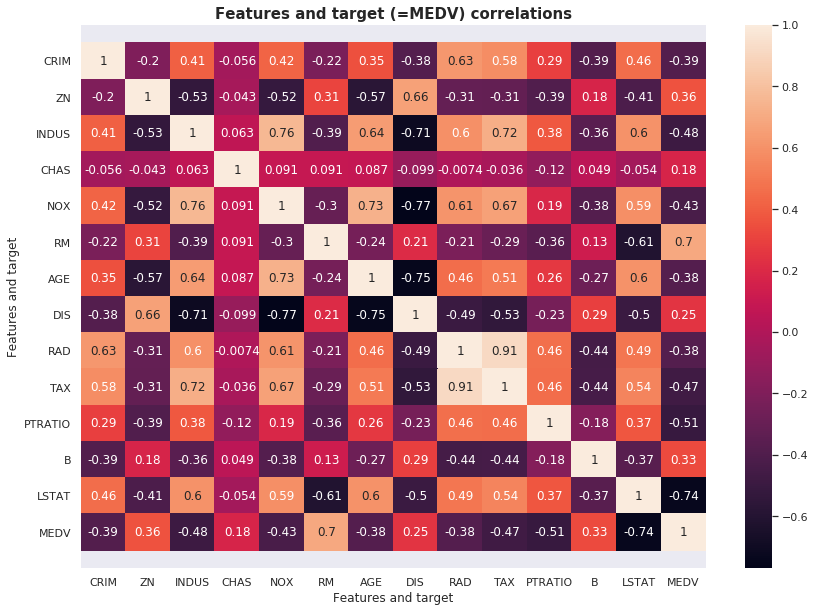

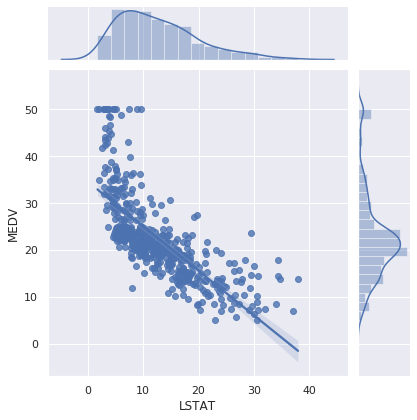

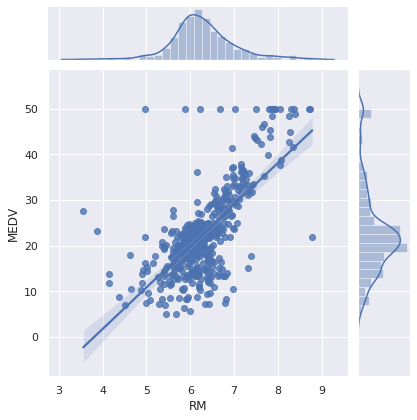

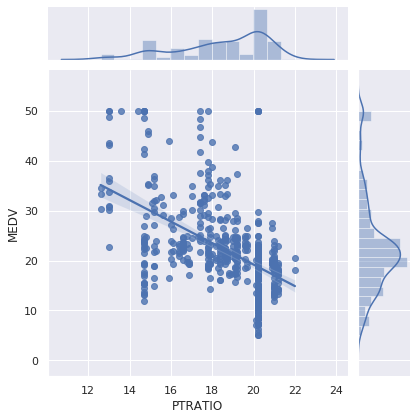

Informations:
	 X ~ (506, 4)
	 y ~ (506, 1)
	 m: 506
	 No. of Features are : 4
	 m_train: 363
	 m_dev: 41
	 m_test: 102


In [8]:
dataset = Dataset(df)
X_train, X_dev, X_test, y_train, y_dev, y_test, m_train, m_dev, m_test, m, n = dataset.load()

*** Multivariate Linear Regression Model ***

In [0]:
class Model:
    
    # just for printing something
    def __str__(self):
        return "Multivariate Linear Regression"
    
    
#--------------------------------------------------------
    # Model parameters and hyperparameters initialization
    def __init__(self):
        print(self)
        self.theta = np.zeros((n, 1)) # Model parameters
        print("theta ~", np.shape(self.theta) )
        self.alpha = 0.06 # Learning rate #0.15 #0.01 #0.001 #0.0001
        self.epochs = 80
        # Cost function values during the training
        self.costs_train = []
        self.costs_dev = []

    #--------------------------------------------------------    
    # Fitting the model to the training set w.r.t. the development set
    def fit(self, X_train, X_dev, y_train, y_dev):
        for epoch in np.arange(1, self.epochs+1):
            
            # Predictions
            preds_train = self.predict(X_train)
            preds_dev = self.predict(X_dev)
            
            # Costs
            J_train = self.cost(preds_train, y_train)
            J_dev = self.cost(preds_dev, y_dev)            
            
            # Accumulating costs for plotting the learning curves
            self.costs_train.append(J_train)
            self.costs_dev.append(J_dev)
            
            # Derivatives
            dtheta = (1/m) * np.matmul(X_train.T , (preds_train - y_train))
            
            # Update parameters
            self.update(dtheta)                        
            
        # Plot the learning curve
        self.plot_learning_curve()
    #--------------------------------------------------------
    # Update the parameters of the model
    def update(self, dtheta):
        self.theta -= self.alpha * dtheta
    #--------------------------------------------------------
    # Model prediction for some examples
    def predict(self, X):
        # Hypothesis
        preds = np.matmul(X, self.theta)
        return preds
    #--------------------------------------------------------
    # Evaluation of model on the test set
    def evaluate(self, X_test, y_test):
        m_test = X_test.shape[0]
        print("test set>")
        preds_test = self.predict(X_test)
        J_test = self.cost(preds_test, y_test)        
        
        se_test = np.sum( np.power( (preds_test-y_test), 2 ) )
        mse_test = (1/m_test)*(se_test)
        rmse_test = np.sqrt( mse_test )
        r2_score = 1-( se_test / np.sum( np.power(y_test-np.mean(y_test),2) ) )
        
        #print("\t", "Cost: ", J_test)
        print("\t", "MSE: ", mse_test)
        print("\t", "RMSE: ", rmse_test)
        print("\t", "r2 score: ", r2_score)

    #--------------------------------------------------------    
    # Use for getting the parameters of the model especially after the training
    def get_parameters(self):
        return self.theta

    #--------------------------------------------------------
    # Plot the learning curve to decision making purposes
    def plot_learning_curve(self):
        def config_figure():
            plt.xlabel("Epoch")
            plt.ylabel("Cost")        
            plt.title("Learning curve [train set]")           
            plt.legend()
        
        data = [[self.costs_train], [self.costs_dev], [self.costs_train, self.costs_dev]]
        labels = [["Trainig cost"], ["Development (validation) cost"], ["Trainig cost", "Development (validation) cost"]]
        styles = [["r-"], ["b-"], ["r-", "b-"]]
        
        for i, [dt, label, style] in enumerate(zip(data, labels, styles), 0):
            plt.figure()    
            for j, d in enumerate(dt, 0):
                plt.plot(np.arange(self.epochs), d, style[j], label=label[j])      
            config_figure()
            plt.show() 
    #--------------------------------------------------------    
    def cost(self, preds, y):
        J = (1/2) * np.mean( np.power( np.sum(preds-y), 2 ) )
        return J

In [0]:
model = Model()

Multivariate Linear Regression
theta ~ (4, 1)


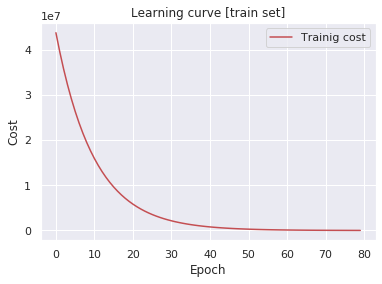

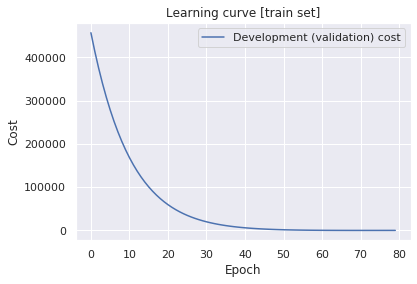

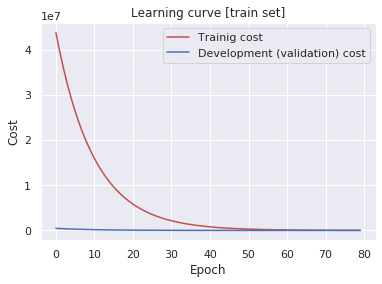

In [0]:
model.fit(X_train, X_dev, y_train, y_dev)

## Scikit-learn Multivariate Linear Regression

In [0]:
from sklearn.metrics import mean_squared_error, r2_score

clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

preds_test = clf.predict(X_test)

## Compare results


In [0]:
print("scikit-learn")
print("test set>")
print("\t", "MSE: ", mean_squared_error(y_test, preds_test))
print("\t", "RMSE: ", np.sqrt(mean_squared_error(y_test, preds_test)))
print("\t", "r2 score: ", r2_score(y_test, preds_test))

scikit-learn
test set>
	 MSE:  52.69911348146155
	 RMSE:  7.259415505497778
	 r2 score:  0.3873909985695485


In [0]:
print("scikit-learn")
clf.coef_.reshape(-1, 1)

scikit-learn


array([[ 0.        ],
       [-3.93692071],
       [ 3.30415376],
       [-2.39305044]])

In [0]:
model.get_parameters()

array([[22.20430788],
       [-3.8843563 ],
       [ 3.43707597],
       [-2.32468044]])

# Logistic Regression 

Fake advertising data set 

>indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.


**Simple File**

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/deepanshumehtaa/csvfiles/master/advertising.csv', index_col = 0)
df = df.reset_index()
df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1000 entries, 68.95 to 45.01
Data columns (total 9 columns):
Age                     1000 non-null int64
Area Income             1000 non-null float64
Daily Internet Usage    1000 non-null float64
Ad Topic Line           1000 non-null object
City                    1000 non-null object
Male                    1000 non-null int64
Country                 1000 non-null object
Timestamp               1000 non-null object
Clicked on Ad           1000 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 78.1+ KB


In [0]:
df.describe()

## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

/usr/local/lib/python3.6/dist-packages/pandas/core/indexes/base.py:2897: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_loc(key)


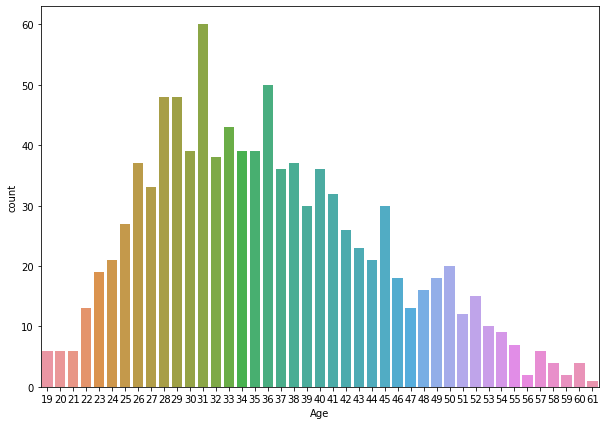

In [0]:
#df.Age.plot(kind = 'hist')
plt.figure(figsize=(10,7))
sb.countplot(df['Age'])
plt.show()

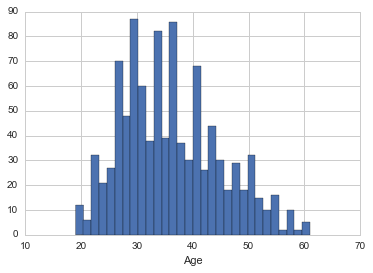

**Create a jointplot showing Area Income versus Age.**

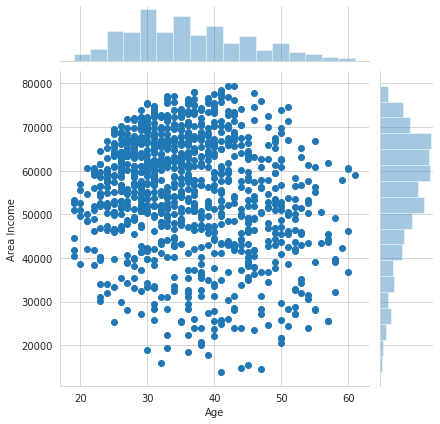

In [0]:
sb.set_style('whitegrid')
sb.jointplot(x= 'Age', y= 'Area Income', data =df)

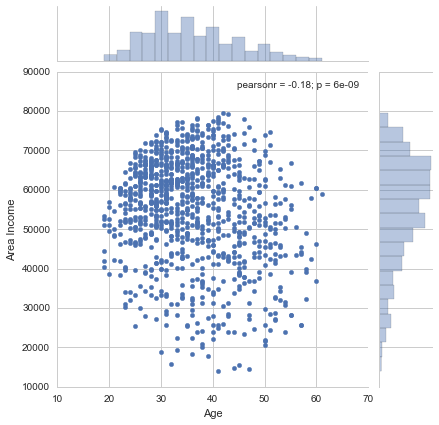

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

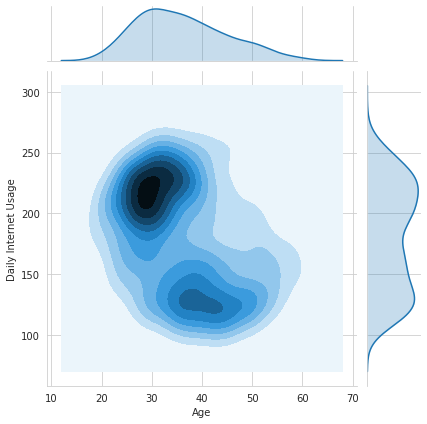

In [0]:
sb.jointplot(x= 'Age', y= 'Daily Internet Usage', data =df, kind='kde')

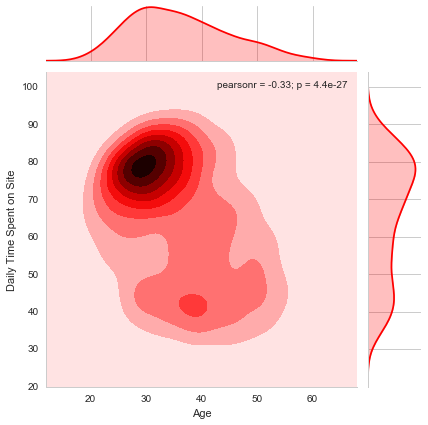

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

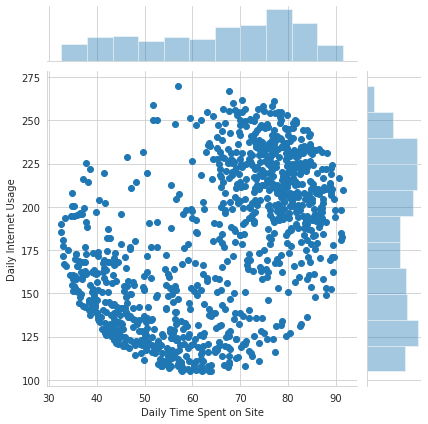

In [0]:
sb.jointplot(x= 'Daily Time Spent on Site', y= 'Daily Internet Usage', data =df)

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

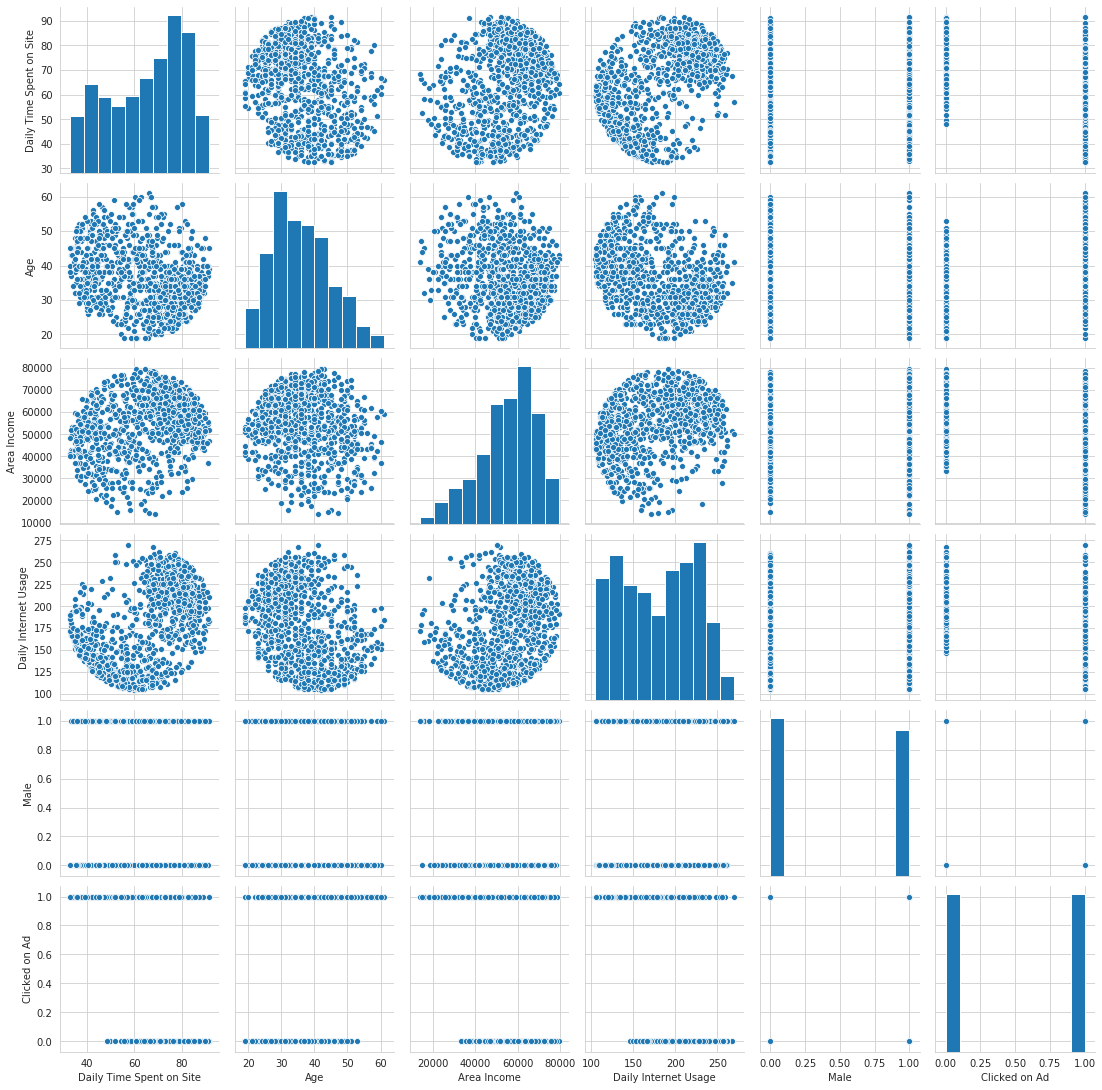

In [0]:
sb.pairplot(df)

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

# Remember above x and y are always in datafrme

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25 )

** Train and fit a logistic regression model on the training set.**

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logi = LogisticRegression()
logi.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [0]:
predictions = logi.predict(x_test)
predictions

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1])

** Create a classification report for the model.**

In [0]:
from sklearn.metrics import classification_report
print((classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       121
           1       0.93      0.87      0.90       129

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250



In [0]:
x_test

In [0]:
predictions = logi.predict(x_test)

## Confusion matrix

In [0]:
cnf_matrix = sklearn.metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[113,   8],
       [ 17, 112]])

Text(0.5, 257.44, 'Predicted label')

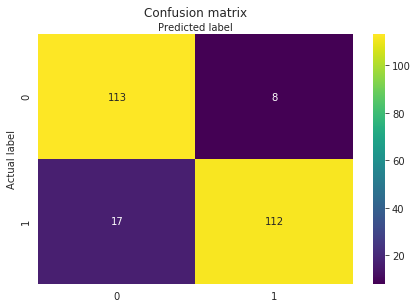

In [0]:
import numpy as np

fig, ax = plt.subplots()
#tick_marks = np.arange(len(class_names))
#plt.xticks(tick_marks, class_names)
#plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
print("Accuracy:",sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy: 0.9


# Try

In [0]:
#Shorthand or attribue in numpy

k = np.array([ [4,5,6],[8,7,6], [0,0,0] ])
print(k, '\n')

print(k.T)

print(k.data, "\n")

print(k.flags, "\n")

print(k.flat)

print(k.size)

print(k.ndim)

print(k.shape)

print(k.base)

[[4 5 6]
 [8 7 6]
 [0 0 0]] 

[[4 8 0]
 [5 7 0]
 [6 6 0]]

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False
 

9
2
(3, 3)
None


In [0]:
print(k[0])  # gives you the first row

[4 5 6]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Assignment 3 : Multi-variant Linear Regression using Gradient Descent

Add upto 3 features and plot graph between cost function and number of iterations.

In [4]:
url = 'https://raw.githubusercontent.com/deepanshumehtaa/csvfiles/master/USA_Housing.csv'
df = pd.read_csv(url, index_col=0, delimiter=',')
df = df.reset_index()
df.head(5)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [13]:
# Selecting the three features
# sb.heatmap(df.corr(), annot=True)

df_ = df[['Avg. Area Income', 'Avg. Area House Age', 'Area Population', 'Price']] 
df_.head(5)


,Avg. Area Income,Avg. Area House Age,Area Population,Price
0,79545.458574,5.682861,23086.800503,1.059034e+06
1,79248.642455,6.002900,40173.072174,1.505891e+06
2,61287.067179,5.865890,36882.159400,1.058988e+06
3,63345.240046,7.188236,34310.242831,1.260617e+06
4,59982.197226,5.040555,26354.109472,6.309435e+05


In [0]:
class Dataset:
    
    def __str__(self):
        return "Dataset: for most of the relevnt collumns" 
    
    def __init__(self, df):
        print(self)        
        self.df = df

    def load(self):

        self.plot_correlations()
        
        X = self.df[['Avg. Area Income', 'Avg. Area House Age', 'Area Population']]
        y = self.df[['Price']]

        # Insert bias feature (x0 = 1) into features for all examples
        #X = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
                
        print("Informations:")
        print("\t X ~", np.shape(X))
        print("\t y ~", np.shape(y))
        
        # Sanity check
        assert(len(X)==len(y))       # assertions are internal self-checks
        m = len(X)                   # declearing m
        self.m = m
        print("\t m:", m)            
        
        # Number of features...... n
        n = np.shape(X)[1]
        self.n = n            
        print("\t No. of Features are (n) is :", n)
        
        
        


        # train, dev, test sets split
        # (dev set) or development set is the data you would use to optimize your model against during the development process
        # Always follow this

        X_train_dev, X_test, y_train_dev, y_test  = train_test_split(X, y, test_size=.2, random_state=0)
        X_train, X_dev, y_train, y_dev            = train_test_split(X_train_dev, y_train_dev, test_size=.1, random_state=0)
                
        # Number of examples
        m_train = len(X_train)
        m_dev = len(X_dev)
        m_test = len(X_test)

        print("\t m_train:", m_train)
        print("\t m_dev:", m_dev)
        print("\t m_test:", m_test)
        
        assert(m_train + m_dev + m_test == m)
            
        return X_train, X_dev, X_test, y_train, y_dev, y_test, m_train, m_dev, m_test, m, n
    
#......................................................................................................

    def plot_correlations(self):
        sns.set(
                style='darkgrid',
                font='sans-serif',
                color_codes=True,
                )                          
        
        #plt.figure(figsize=(14, 10))
        #correlation_matrix = self.df.corr()        
        #ax = sns.heatmap(correlation_matrix, annot=True)                
        sns.jointplot("Avg. Area House Age", "Price", data=self.df, kind="reg")        
        sns.jointplot("Avg. Area Income", "Price", data=self.df, kind="reg")        
        sns.jointplot("Area Population", "Price", data=self.df, kind="reg")        
        plt.show()


Dataset: for most of the relevnt collumns


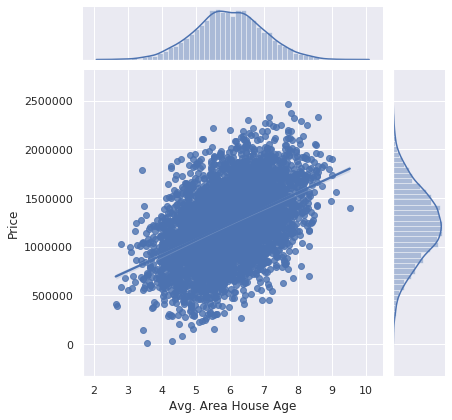

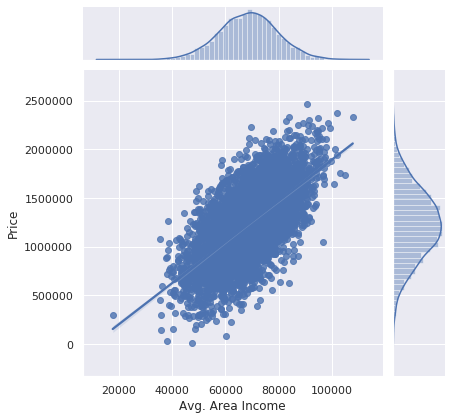

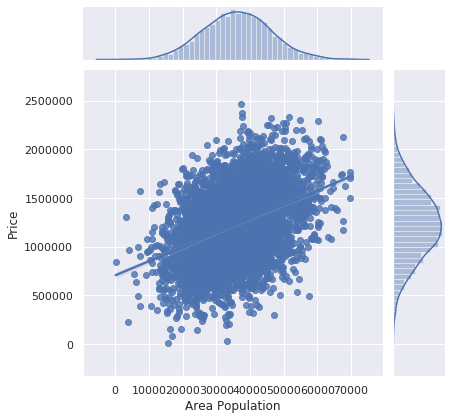

Informations:
	 X ~ (5000, 3)
	 y ~ (5000, 1)
	 m: 5000
	 No. of Features are (n) is : 3
	 m_train: 3600
	 m_dev: 400
	 m_test: 1000


In [33]:
df_ = df.reset_index()
dataset = Dataset(df_)
X_train, X_dev, X_test, y_train, y_dev, y_test, m_train, m_dev, m_test, m, n = dataset.load()

*** Model *** 

In [0]:
class Model:
    
    # just for printing something
    def __str__(self):
        return "Multivariate Linear Regression"
    
    
#--------------------------------------------------------
    # Model parameters and hyperparameters initialization
    def __init__(self):
        print(self)
        self.theta = np.zeros((n, 1)) # Model parameters
        print("theta ~", np.shape(self.theta) )
        self.alpha = 0.06 # Learning rate #0.15 #0.01 #0.001 #0.0001
        self.epochs = 80
        # Cost function values during the training
        self.costs_train = []
        self.costs_dev = []

    #--------------------------------------------------------    
    # Fitting the model to the training set w.r.t. the development set
    def fit(self, X_train, X_dev, y_train, y_dev):
        for epoch in np.arange(1, self.epochs+1):
            
            # Predictions
            preds_train = self.predict(X_train)
            preds_dev = self.predict(X_dev)
            
            # Costs
            J_train = self.cost(preds_train, y_train)
            J_dev = self.cost(preds_dev, y_dev)            
            
            # Accumulating costs for plotting the learning curves
            self.costs_train.append(J_train)
            self.costs_dev.append(J_dev)
            
            # Derivatives
            dtheta = (1/m) * np.matmul(X_train.T , (preds_train - y_train))
            
            # Update parameters
            self.update(dtheta)                        
            
        # Plot the learning curve
        self.plot_learning_curve()
    #--------------------------------------------------------
    # Update the parameters of the model
    def update(self, dtheta):
        self.theta -= self.alpha * dtheta
    #--------------------------------------------------------
    # Model prediction for some examples
    def predict(self, X):
        # Hypothesis
        preds = np.matmul(X, self.theta)
        return preds
    #--------------------------------------------------------
    # Evaluation of model on the test set
    def evaluate(self, X_test, y_test):
        m_test = X_test.shape[0]
        print("test set>")
        preds_test = self.predict(X_test)
        J_test = self.cost(preds_test, y_test)        
        
        se_test = np.sum( np.power( (preds_test-y_test), 2 ) )
        mse_test = (1/m_test)*(se_test)
        rmse_test = np.sqrt( mse_test )
        r2_score = 1-( se_test / np.sum( np.power(y_test-np.mean(y_test),2) ) )
        
        #print("\t", "Cost: ", J_test)
        print("\t", "MSE: ", mse_test)
        print("\t", "RMSE: ", rmse_test)
        print("\t", "r2 score: ", r2_score)

    #--------------------------------------------------------    
    # Use for getting the parameters of the model especially after the training
    def get_parameters(self):
        return self.theta

    #--------------------------------------------------------
    # Plot the learning curve to decision making purposes
    def plot_learning_curve(self):
        def config_figure():
            plt.xlabel("Epoch")
            plt.ylabel("Cost")        
            plt.title("Learning curve [train set]")           
            plt.legend()
        
        data = [[self.costs_train], [self.costs_dev], [self.costs_train, self.costs_dev]]
        labels = [["Trainig cost"], ["Development (validation) cost"], ["Trainig cost", "Development (validation) cost"]]
        styles = [["r-"], ["b-"], ["r-", "b-"]]
        
        for i, [dt, label, style] in enumerate(zip(data, labels, styles), 0):
            plt.figure()    
            for j, d in enumerate(dt, 0):
                plt.plot(np.arange(self.epochs), d, style[j], label=label[j])      
            config_figure()
            plt.show() 
    #--------------------------------------------------------    
    def cost(self, preds, y):
        J = (1/2) * np.mean( np.power( np.sum(preds-y), 2 ) )
        return J

In [35]:
model = Model()

Multivariate Linear Regression
theta ~ (3, 1)


In [36]:
model.fit(X_train, X_dev, y_train, y_dev)

ValueError: ignored